<a href="https://colab.research.google.com/github/Joshua-Joseph/amazon-scraping/blob/main/reluAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TASK 1

In [1]:
from bs4 import BeautifulSoup
import requests

In [2]:
import pandas as pd
df = pd.read_csv('/content/Amazon Scraping - Sheet1.csv')

In [3]:
df

,Unnamed: 0,id,Asin,country
0,0,1,1015,de
1,1,2424796,1015,fr
2,2,2,000004458X,de
3,3,2424797,000004458X,fr
4,4,3,1002198,de
...,...,...,...,...
995,995,2425286,4484924,fr
996,996,449,4485742,de
997,997,2425287,4485742,fr
998,998,450,4486072,de


In [4]:
df.drop('Unnamed: 0', axis = 1)

,id,Asin,country
0,1,1015,de
1,2424796,1015,fr
2,2,000004458X,de
3,2424797,000004458X,fr
4,3,1002198,de
...,...,...,...
995,2425286,4484924,fr
996,449,4485742,de
997,2425287,4485742,fr
998,450,4486072,de


In [5]:
df['country'].value_counts()

fr    493
de    450
it     48
es      9
Name: country, dtype: int64

In [6]:
HEADERS = [{'User-Agent':
           'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'}, {'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}, {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.64 Safari/537.36'}, {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'}]
print(len(HEADERS))

4


In [7]:
global info
info = {}
global i
i = 0
from datetime import datetime
global k
k = 0

In [8]:
def getInfo(url, id):
  global i, start, info, k
  a=k%4
  k+=1
  i+=1
  localInfo = {}
  webpage = requests.get(url, headers=HEADERS[a])
  soup = BeautifulSoup(webpage.content, "lxml")
  try:
    title = soup.find("span", attrs={"id" :"productTitle"})
    title = title.string
    title = title.strip().replace(',','')
    localInfo['Product Title'] = title
  except:
    title = ""
  ####

  try:
    price = soup.find("span", attrs={"class":"a-price-whole"})
    price = price.string
    price = price.strip().replace(',','')
    localInfo['Product Price'] = price
  except:
    try:
      price = soup.find("span", attrs={"id" : "price"})
      price = price.string
      price = price.strip().replace(',','')
      localInfo['Product Price'] = price
    except:
      price = ""
  ####

  try:
    img = soup.find("img", attrs={"id" :"imgBlkFront"})
    img = img['src']
    localInfo['Product Image URL'] = img
  except:
    img = ""
  ####

  # try:
  #   details = soup.find("ul", attrs={"class" :"a-unordered-list a-nostyle a-vertical a-spacing-none detail-bullet-list"})
  #   details = details.text
  #   details = formatText(details.text)
  #   localInfo['Product Details'] = details
  # except:
  #   details = ""
  try:
    details = soup.find("div", attrs={"class" : "a-section a-spacing-small a-padding-small"})
    details = details.text
    localInfo['Product Details'] = details
  except:
      try:
        details = soup.find("ul", attrs={"class" :"a-unordered-list a-nostyle a-vertical a-spacing-none detail-bullet-list"})
        details = details.text
        details = formatText(details.text)
        localInfo['Product Details'] = details
      except:
        details = ""
    
    
  if(len(localInfo)>0):
    print(localInfo)
    info[id] = localInfo
  else:
    print(url, 'Not Available')
  
  if(i%100==0):
    print(i, datetime.now()-start)
    start = datetime.now()

  return

In [9]:
def formatText(details):
  details = details.replace('   ', ',')
  details = details.replace(' ', '')
  details = details.strip().replace('\n','')
  details = details.replace(',,,,,,,,,,,,‏,,,,,,,,,,,,,', '')
  details = details.replace(',,,,,,,,,,,,‎,,,,,,,,,,,', '')
  details = details.replace(',', ', ')
  details = details.replace(':', ' : ')
  return details

In [10]:
global start
start = datetime.now()
for j in range(len(df)):
  url = 'https://www.amazon.'+df['country'][i]+'/dp/'+df['Asin'][i]
  getInfo(url, int(df['id'][i]))

https://www.amazon.de/dp/1015 Not Available
https://www.amazon.fr/dp/1015 Not Available
{'Product Title': 'Old Spice Rasur Creme - 70 G (original) - Packung Von 2'}
https://www.amazon.fr/dp/000004458X Not Available
https://www.amazon.de/dp/1002198 Not Available
https://www.amazon.fr/dp/1002198 Not Available
https://www.amazon.fr/dp/1002791 Not Available
https://www.amazon.it/dp/1002791 Not Available
https://www.amazon.de/dp/1002864 Not Available
https://www.amazon.fr/dp/1002864 Not Available
https://www.amazon.de/dp/1003704 Not Available
https://www.amazon.fr/dp/1003704 Not Available
https://www.amazon.de/dp/1003763 Not Available
https://www.amazon.fr/dp/1003763 Not Available
https://www.amazon.fr/dp/1004271 Not Available
https://www.amazon.it/dp/1004271 Not Available
{'Product Title': 'Short Story: Violoncello und Klavier. (Cello-Bibliothek)', 'Product Image URL': 'https://images-eu.ssl-images-amazon.com/images/I/41zw0783tpL._SX198_BO1,204,203,200_QL40_ML2_.jpg'}
{'Product Title': 'Sh

In [11]:
len(info)

93

In [12]:
import json
result = json.dumps(info, indent = 3)
with open("assignment.json", "w") as fileToWrite:
    fileToWrite.write(result)

## BONUS TASK 

In [13]:
!pip install amazoncaptcha

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 937 kB 26.5 MB/s 
     |████████████████████████████████| 3.1 MB 49.7 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2


In [16]:
from amazoncaptcha import AmazonCaptcha
from bs4 import BeautifulSoup
import requests
import urllib.request

In [4]:
HEADERS = ({'User-Agent':
           'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'})

In [17]:
webpage = requests.get('https://www.amazon.com/errors/validateCaptcha', headers=HEADERS)
soup = BeautifulSoup(webpage.content, "lxml")
img = soup.find("div", attrs={"class" :"a-row a-text-center"})
img = img.find("img")
img = img['src']
urllib.request.urlretrieve(img, "1.jpg")

('1.jpg', <http.client.HTTPMessage at 0x7fe2115e6210>)

In [18]:
captcha = AmazonCaptcha.fromlink(img)
solution = captcha.solve()
print(solution)

LEBBLN


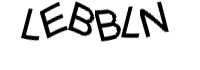

In [19]:
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread('/content/1.jpg')
cv2_imshow(image)